Task 3.2.1

Network Info: 32 nodes, 89 edges

Community Detection Metrics Summary:
    modularity  modularity_ratio  volume  edges_cut
k                                                  
1        0.306             0.857  89.000     15.000
2        0.303             0.578  59.333     10.667
3        0.307             0.439  44.500      9.000
4        0.292             1.462  35.600      8.800
5        0.289             1.220  29.667      8.000
6        0.280             1.047  25.429      7.714
7        0.259             0.914  22.250      7.750
8        0.243             0.811  19.778      7.556
9        0.225             0.727  17.800      7.400
10       0.220             0.668  16.182      7.091
11       0.208             0.612  14.833      7.000
12       0.183             0.562  13.692      7.077
13       0.193             0.528  12.714      7.000
14       0.172             0.490  11.867      6.933
15       0.147             0.453  11.125      6.875
      k  modularity  modularity_ratio  volume

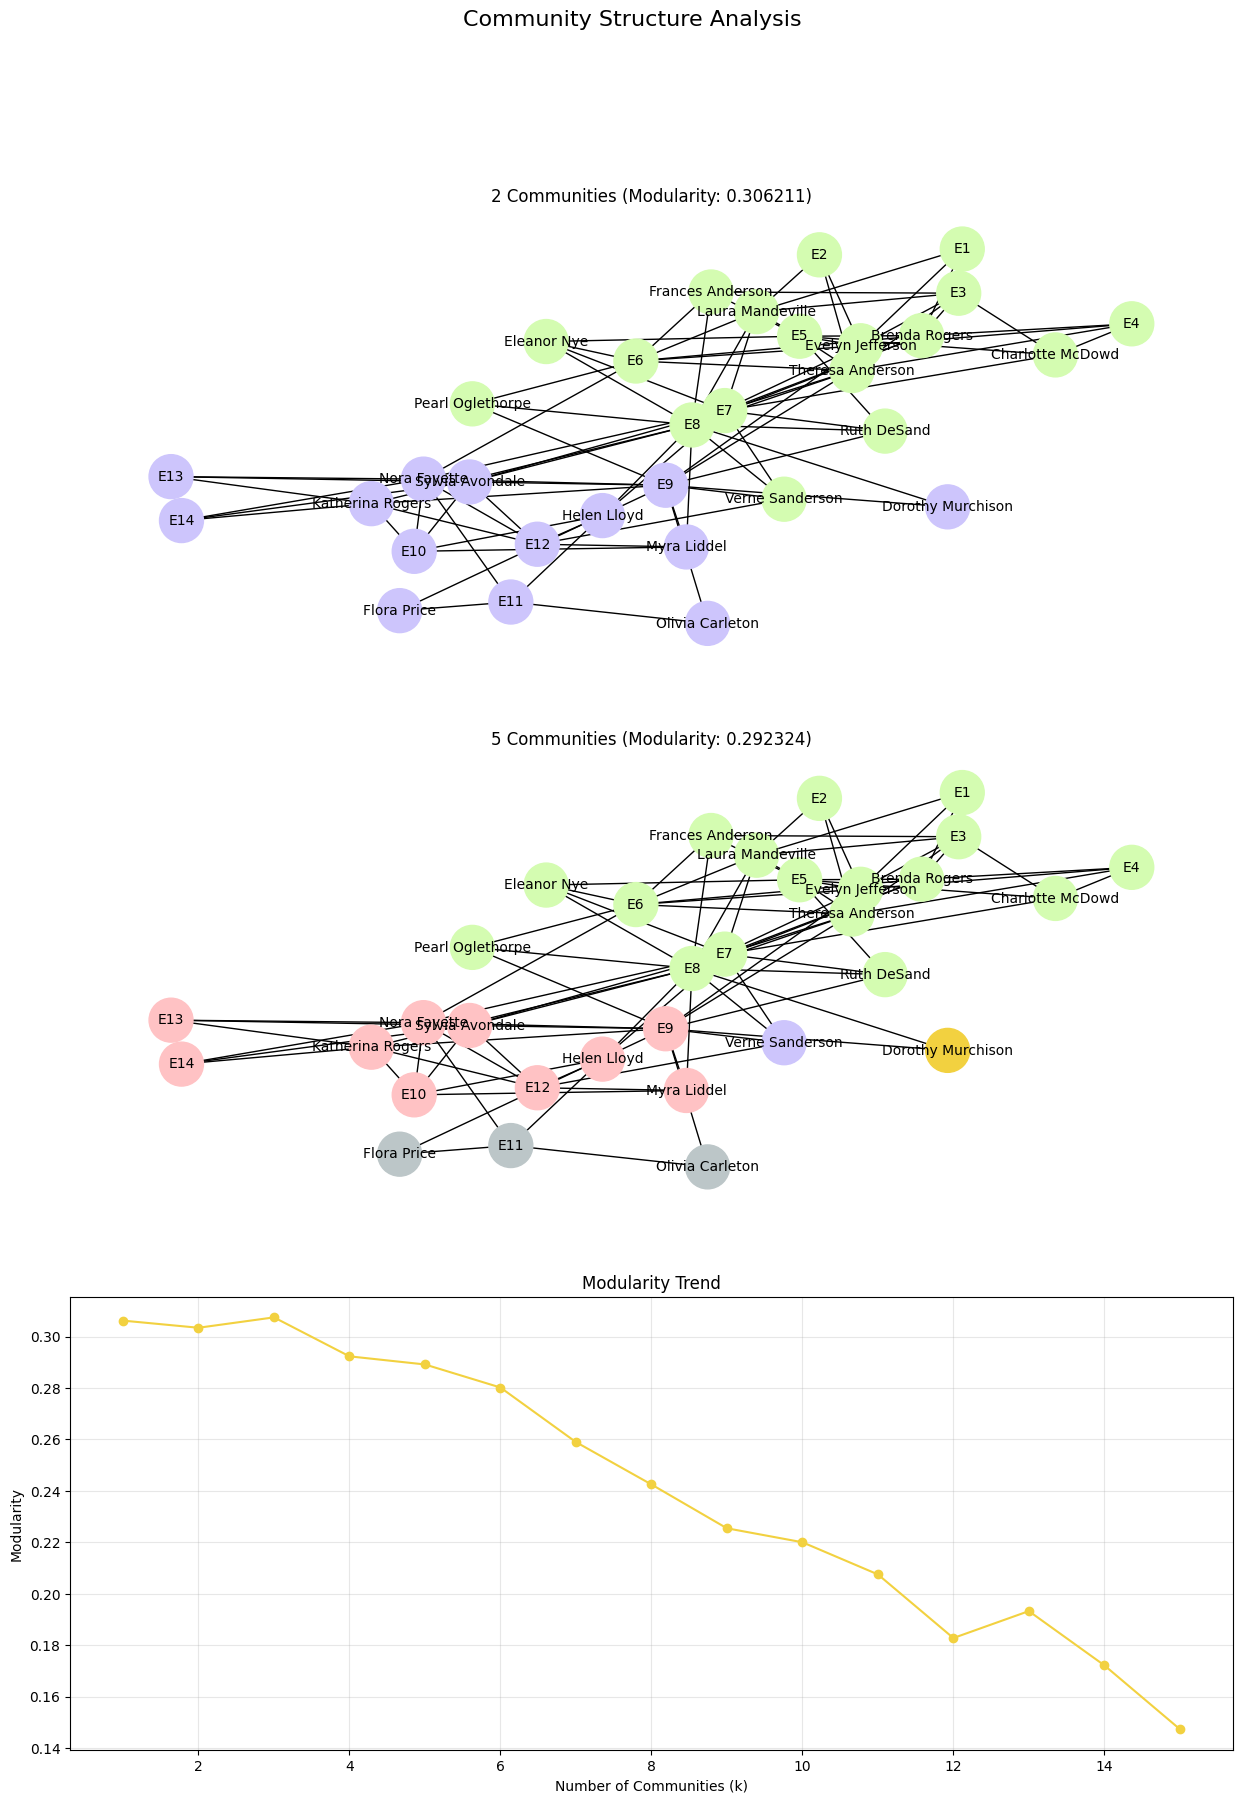

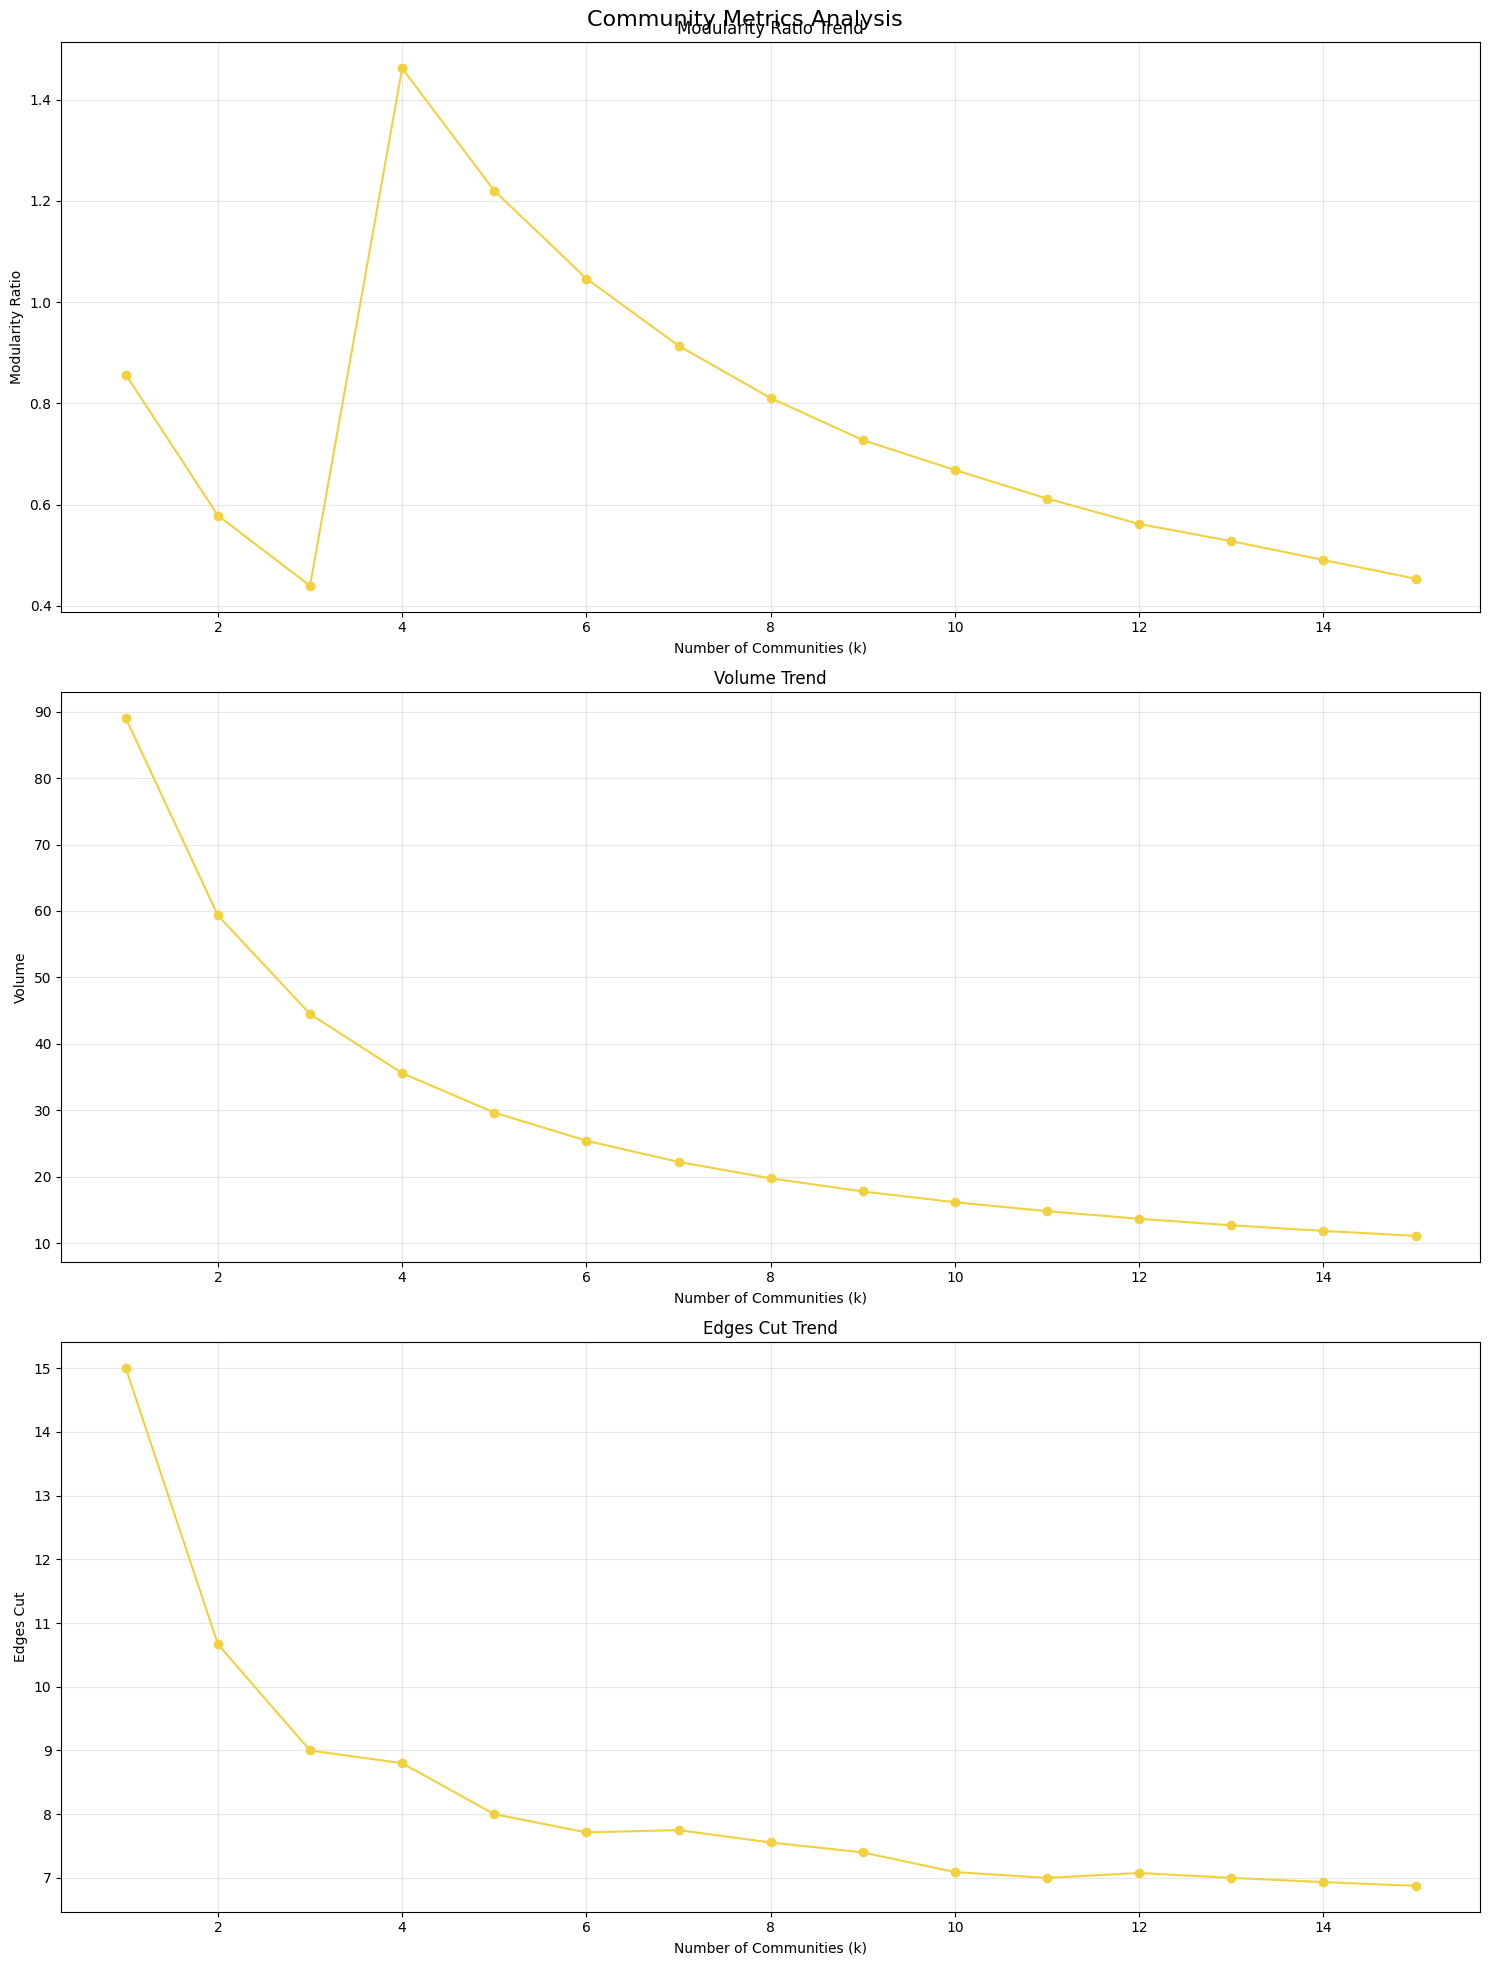

In [16]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

class CommunityAnalyzer:
    def __init__(self, G):
        self.G = G
        self.communities = list(nx.community.girvan_newman(G))

    def modularity_ratio(self, G, community):
        """Calculate modularity ratio for a community"""
        community = list(community)
        edges_between_community = 0
        for node in community:
            neighbors = set(G.neighbors(node))
            edges_between_community += sum(1 for n in neighbors if n in community)
        edges_between_community //= 2
        expected_edges = sum(G.degree(node) for node in community)**2 / (2 * G.size())
        return edges_between_community / expected_edges if expected_edges != 0 else 0

    def volume(self, G, community):
        """Calculate volume of a community"""
        return sum(G.degree(node) for node in list(community))

    def edges_cut(self, G, community):
        """Calculate number of edges cut for a community"""
        community = list(community)
        return sum(1 for node in community
                  for neighbor in G.neighbors(node)
                  if neighbor not in community)

    def analyze_communities(self):
        """Analyze communities and calculate metrics"""
        metrics_data = []
        for k in range(len(self.communities)//2):
            for community in self.communities[k]:
                metrics_data.append({
                    'k': k + 1,
                    'modularity': nx.community.modularity(self.G, self.communities[k]),
                    'modularity_ratio': self.modularity_ratio(self.G, community),
                    'volume': self.volume(self.G, community),
                    'edges_cut': self.edges_cut(self.G, community)
                })
        return pd.DataFrame(metrics_data)

    def plot_metrics(self, metrics_df):
        print(metrics_df)
        """Create visualizations for metrics and communities"""
        # First figure: Community visualizations and modularity
        fig1, axes1 = plt.subplots(3, 1, figsize=(15, 20))
        fig1.suptitle('Community Structure Analysis', fontsize=16)

        # Plot communities
        for idx, k in enumerate([0, 3]):
            communities = self.communities[k]
            modularity = round(nx.community.modularity(self.G, communities), 6)
            pos = nx.spring_layout(self.G, k=0.3, iterations=50, seed=2)

            axes1[idx].set_title(f"{len(communities)} Communities (Modularity: {modularity})")
            colors = ["#D4FCB1", "#CDC5FC", "#FFC2C4", "#F2D140", "#BCC6C8"]
            node_colors = [colors[list(map(lambda c: node in c, communities)).index(True) % len(colors)]
                         for node in self.G.nodes()]

            nx.draw(self.G, pos=pos, node_color=node_colors, node_size=1000,
                   with_labels=True, font_size=10, font_color="black", ax=axes1[idx])

        # Plot modularity trend
        metrics_df.groupby('k')['modularity'].first().plot(
            ax=axes1[2], color="#F2D140", marker='o',
            title="Modularity Trend")
        axes1[2].set_xlabel("Number of Communities (k)")
        axes1[2].set_ylabel("Modularity")
        axes1[2].grid(True, alpha=0.3)

        # Second figure: Other metrics
        fig2, axes2 = plt.subplots(3, 1, figsize=(15, 20))
        fig2.suptitle('Community Metrics Analysis', fontsize=16)

        metrics = {
            'modularity_ratio': 'Modularity Ratio',
            'volume': 'Volume',
            'edges_cut': 'Edges Cut'
        }

        for idx, (metric, title) in enumerate(metrics.items()):
            metrics_df.groupby('k')[metric].mean().plot(
                ax=axes2[idx], color="#F2D140", marker='o',
                title=f"{title} Trend")
            axes2[idx].set_xlabel("Number of Communities (k)")
            axes2[idx].set_ylabel(title)
            axes2[idx].grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

        return fig1, fig2

def main():
    # Create and analyze karate club network
    G = nx.davis_southern_women_graph()
    print(f"Network Info: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")

    # Initialize analyzer and calculate metrics
    analyzer = CommunityAnalyzer(G)
    metrics_df = analyzer.analyze_communities()

    # Display metrics
    print("\nCommunity Detection Metrics Summary:")
    summary = metrics_df.groupby('k').agg({
        'modularity': 'first',
        'modularity_ratio': 'mean',
        'volume': 'mean',
        'edges_cut': 'mean'
    }).round(3)
    print(summary)

    # Create visualizations
    analyzer.plot_metrics(metrics_df)

if __name__ == "__main__":
    main()

Task 3.2.2
